Comparisons are made on the spherical waves.

Packages to import

In [1]:
import sys
sys.path.append("../functions")
from models_prop import propagation_ew, GaussianCoeffs
import json
import numpy as np
from matplotlib import pyplot as plt
from abtem.core.constants import kappa
from abtem.core.energy import energy2sigma, energy2wavelength
import scipy
from abtem import Potential
from ase import Atoms
from abtem import PlaneWave
with open("../data/doyle_turner.json") as files:
    dict_coeff = json.load(files)
import torch

1. Potential comparisons

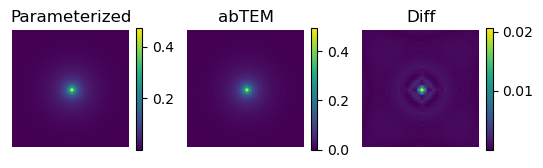

In [2]:
#Potential from models
symbol = "Al"
array_coeff = np.array(dict_coeff[symbol])
array_coeff[1,:] /= 4
scaled_coeff = torch.tensor(np.vstack((np.pi / kappa * array_coeff[0,:] / array_coeff[1,:],
                np.pi**2 / array_coeff[1,:])))
energy = 300e3; sampling = 0.1
sigma = energy2sigma(energy)
x = np.arange(-2, 2, sampling)
y = np.arange(-2, 2, sampling)
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)
coeffs_obj = GaussianCoeffs(symbol)

potential = coeffs_obj.projected_potential(r.ravel()).reshape(r.shape)
plt.subplot(1, 3, 1)
plt.imshow(sigma*potential)
plt.colorbar(shrink=0.33)
plt.axis("off")
plt.title("Parameterized")

#Potential from abTEM
Al_example = Atoms("Al", scaled_positions=[[0.5, 0.5, 0.5]], cell=[4, 4, 1])
Al_potarr = np.array(Potential(Al_example, sampling=sampling).build().array)[0,:,:]
plt.subplot(1, 3, 2)
plt.imshow(sigma*Al_potarr)
plt.colorbar(shrink=0.33)
plt.axis("off")
plt.title("abTEM")

#Comparisons
diff = np.abs(Al_potarr - potential)
plt.subplot(1, 3, 3)
plt.imshow(sigma*diff)
plt.colorbar(shrink=0.33)
plt.axis("off")
plt.title("Diff")
plt.show()

2. Wavefunction comparisons

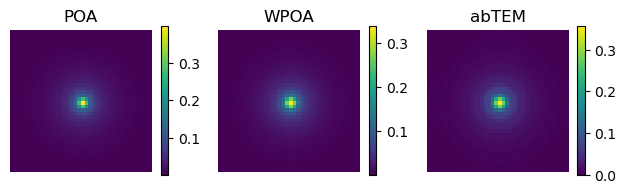

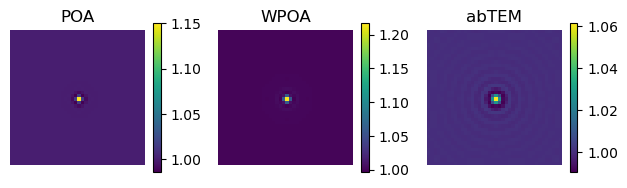

In [3]:
#Phase Object approximation
POA = propagation_ew(np.exp(1j*sigma*potential),1,sampling,energy)

#Weak Phase Object approximation
WPOA = propagation_ew(1 + 1j*sigma*potential,1,sampling,energy)

#Generated from abTEM
ew = np.array(PlaneWave(sampling=sampling, energy=energy).multislice(Al_example).array)

#Comparisons
plt.subplot(1, 3, 1)
plt.imshow(np.angle(POA))
plt.colorbar(shrink=0.33)
plt.axis("off")
plt.title("POA")
plt.subplot(1, 3, 2)
plt.imshow(np.angle(WPOA))
plt.colorbar(shrink=0.33)
plt.axis("off")
plt.title("WPOA")
plt.subplot(1, 3, 3)
plt.imshow(np.angle(ew))
plt.colorbar(shrink=0.33)
plt.axis("off")
plt.title("abTEM")
plt.tight_layout()
plt.show()

plt.subplot(1, 3, 1)
plt.imshow(np.abs(POA))
plt.colorbar(shrink=0.33)
plt.axis("off")
plt.title("POA")
plt.subplot(1, 3, 2)
plt.imshow(np.abs(WPOA))
plt.colorbar(shrink=0.33)
plt.axis("off")
plt.title("WPOA")
plt.subplot(1, 3, 3)
plt.imshow(np.abs(ew))
plt.colorbar(shrink=0.33)
plt.axis("off")
plt.title("abTEM")
plt.tight_layout()
plt.show()

3. modeling propagation

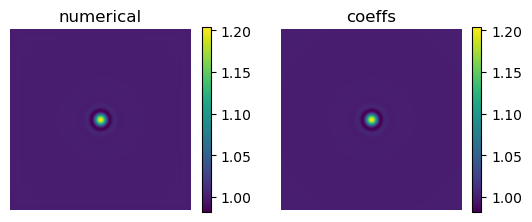

In [4]:
AlCoeffs = GaussianCoeffs("Al")
energy = 300e3; sampling = 0.01
sigma = energy2sigma(energy)
x = np.arange(-2, 2, sampling)
y = np.arange(-2, 2, sampling)
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)
potential = AlCoeffs.projected_potential(r.ravel()).reshape(r.shape)
wave = 1 + 1j*sigma*potential
distance = 2
#Propagation numerically
wave_prop1 = propagation_ew(wave, distance, sampling, energy)
AlCoeffsProp = GaussianCoeffs("Al")
AlCoeffsProp.propagate(distance, energy)
potential_prop = AlCoeffsProp.projected_potential(r.ravel()).reshape(r.shape)
#Propagation by resetting the coefficients
wave_prop2 = 1 + 1j*sigma*potential_prop
diff = wave_prop1 - wave_prop2
plt.subplot(1, 2, 1)
plt.imshow(np.abs(wave_prop1))
plt.colorbar(shrink=0.5)
plt.axis("off")
plt.title("numerical")
plt.subplot(1, 2, 2)
plt.imshow(np.abs(wave_prop2))
plt.colorbar(shrink=0.5)
plt.axis("off")
plt.title("coeffs")
plt.show()